Case Distribution and Status:

    How many filed cases are there in the dataset?
    What is the distribution of case outcomes (resolved, pending, etc.)?

Case Age and Resolution Time:

    What is the average time a case spends in court before being resolved?
    Can we identify any trends or patterns in case resolution time based on case type (criminal or civil)?

Reasons for Adjournment:

    What are the most common reasons for case adjournment in the dataset?

    Is there a relationship between the reasons for adjournment and case outcomes?

Comparative Analysis:

    Are there any significant differences in case age and resolution times between criminal and civil cases based on the "coming for" category?

    Do specific "coming for" categories lead to quicker or more successful case resolutions?



In [1]:
#load the necessary libraries
import pandas as pd
import time
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
original_df = pd.read_csv('./data/dummy.csv', dtype=str)

In [3]:
df = original_df.copy()

In [4]:
df.columns

Index(['court_name', 'date_dd', 'date_mon', 'date_yyyy', 'caseid_type',
       'caseid_no', 'filed_dd', 'filed_mon', 'filed_yyyy', 'origcourt',
       'appeal_type', 'appeal_no', 'appeal_yyyy', 'case_type', 'bench_1',
       'bench_2', 'bench_3', 'bench_4', 'bench_5', 'bench_6', 'bench_7',
       'comingfor', 'outcome', 'reason_adj', 'next_dd', 'next_mon',
       'next_yyyy', 'firstparty_m', 'firstparty_f', 'firstparty_org',
       'secondparty_m', 'secondparty_f', 'secondparty_o', 'legalrep',
       'p_witness', 'd_witness', 'custody', 'other_details'],
      dtype='object')

### Case Distribution and Status:
1. How many filed cases are there in the dataset?

In [35]:
#Function to inspect the data for duplicates
def remove_duplicates(data: pd.DataFrame) -> pd.DataFrame:
    
    if data.duplicated().any():
        num_duplicates = data.duplicated().sum()
        print(f"{num_duplicates} duplicates found.")
        
        data.drop_duplicates(keep="first", inplace=True)
        data.reset_index(drop=True, inplace=True)
        
        print(f"{num_duplicates} Duplicates removed.")
    else:
        print("No duplicates found.")

    return data

In [36]:
### Identify and remove duplicates
df = remove_duplicates(df)

5617 duplicates found.
5617 Duplicates removed.


In [37]:
#Create a unique case identifier
df["case_num"] = df ['court_name'] + "-" + df["caseid_type"]+ "-" + df["caseid_no"].astype(str) + "/" + df["filed_yyyy"].astype(str)

#### outcomes that represent status of a case either registered or resolved

In [38]:
new_case_outcome = ['RETRIAL', 'CASE REACTIVATED', 'CASE REGISTERED/FILED']
final_outcome = ['ABATED', 'CONSOLIDATED- CASE CLOSED', 'CONVICTION', 'RULING-CASE CLOSED', 'GRANT CONFIRMED', 'DISMISSED', 'SENTENCED', 'OUT OF COURT SETTLEMENT', 'CONSENT RECORDED- CASE CLOSED',
    'MATTER WITHDRAWN', 'JUDGMENT DELIVERED', 'FILE TRANSFERED', 'ACQUITTAL', 'LIMITED GRANT ISSUED', 'GRANT REVOKED'
]

### Create a function to group the cases into pending, registered or concluded

In [39]:
def categorize_outcome(df: pd.DataFrame, filed: list, resolved: list) -> pd.DataFrame:
    conditions = [
        df['outcome'].isin(filed),
        df['outcome'].isin(resolved)
    ]
    choices = ['Registered', 'Resolved']
    df['outcome_category'] = np.select(conditions, choices, default="None")
    return df

In [40]:
df = categorize_outcome(df, new_case_outcome, final_outcome)

In [41]:
df['outcome_category'].value_counts()

outcome_category
None          550037
Registered    124115
Resolved      114269
Name: count, dtype: int64

In [42]:
df2= df.copy()

In [43]:
df2.drop_duplicates(subset=['case_num', 'outcome_category'], keep='first', inplace=True)

In [44]:
df2['outcome_category'].value_counts()

outcome_category
None          153204
Registered    122335
Resolved      109021
Name: count, dtype: int64

In [18]:
#Create a column to for a resolve case which had multiple cases events 
dfs['case_status'] = df2.groupby(['case_num'])['outcome_category'].transform(lambda x: 'Closed' if 'Resolved' in x.values else 'Active')

In [ ]:
df['case_status'].value_counts()

In [22]:
resolved_df = df[df['case_status'] == "Closed"].drop_duplicates(subset=['case_num'], keep='first')
resolved_df['case_status'].value_counts()

case_status
Closed    109021
Name: count, dtype: int64

In [23]:
pending_df = df[df['case_status'] == "Active"].drop_duplicates(subset=['case_num'], keep='first')
pending_df['case_status'].value_counts()

case_status
Active    118965
Name: count, dtype: int64

In [31]:
pending_df['outcome_category'].value_counts()

NameError: name 'pending_df' is not defined

In [24]:
clean_df = df.drop_duplicates(subset=['case_num'], keep='first')


In [30]:
clean_df['outcome_category'].value_counts()

NameError: name 'clean_df' is not defined

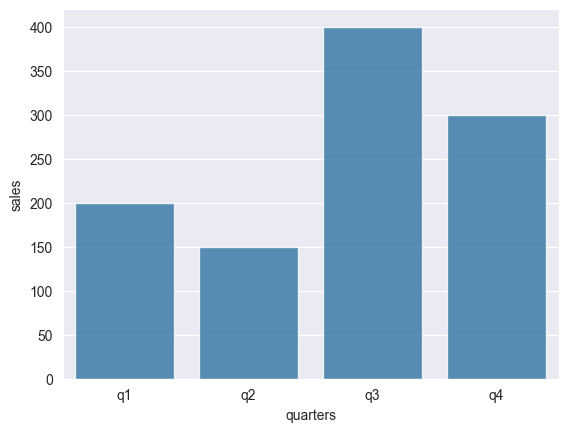

In [26]:
quarters = ['q1', 'q2', 'q3', 'q4']
sales = [200, 150, 400, 300]
sales_df = pd.DataFrame({
    'quarters': quarters,
    'sales': sales
})
sns.set_style('darkgrid')
sns.barplot(x='quarters', y='sales', alpha=0.8, data=sales_df)
plt.show()

In [27]:
sales_df

,quarters,sales
0,q1,200
1,q2,150
2,q3,400
3,q4,300


In [48]:
status_df

case_status
Active    118965
Closed    109021
Name: case_status, dtype: int64

In [29]:
type(plot_df)

NameError: name 'plot_df' is not defined

ValueError: not enough values to unpack (expected 2, got 0)

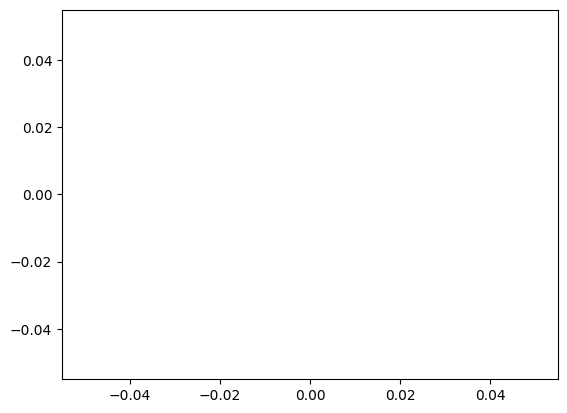

In [35]:
plot_df = clean_df['case_status'].value_counts()

fig, ax1 = plt.plot(figsize=(10, 10))
sns.barplot(x='Category', y='Total', hue='Category', data=plot_df, ax=ax1)
sns.despine(fig=fig)

ax = sns.barplot(x = 'categories', y = 'frequency', data = category_df)

In [30]:
plot_df = clean_df['case_status'].value_counts()

In [33]:
plot_df

case_status
Active    118965
Closed    109021
Name: count, dtype: int64

In [ ]:
tidy = df.melt(id_vars='Factor').rename(columns=str.title)


In [27]:
example_df = pd.DataFrame({
    'Factor': ['Growth', 'Value'],
    'Weight': [0.10, 0.20],
    'Variance': [0.15, 0.35]
})
example_df

,Factor,Weight,Variance
0,Growth,0.1,0.15
1,Value,0.2,0.35


In [ ]:
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
seaborn.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1)
seaborn.despine(fig)

In [29]:
tidy = example_df.melt(id_vars='Factor').rename(columns=str.title)
tidy

,Factor,Variable,Value
0,Growth,Weight,0.10
1,Value,Weight,0.20
2,Growth,Variance,0.15
3,Value,Variance,0.35


### Case Age and Resolution Time:
1. What is the average time a case spends in court before being resolved?
2. Can we identify any trends or patterns in case resolution time based on case type (criminal or civil)?


### Reasons for adjournment
**Crosstab case type and total adjournments**